In [1]:
import pandas as pd
import json
from collections import defaultdict
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#Collected the "Ne Veiriyim Abime" data then removed the unnecesarry parts, as like img, preview, album date and added at 

# Read the CSV file
df = pd.read_csv('Ne Veriyim Abime.csv')

# Set option to display all rows
pd.set_option('display.max_rows', None)
columns_to_remove = ['Spotify Track Img', 'Song Preview', 'Album Date', 'Added At']
df.drop(columns=columns_to_remove, inplace=True)
# Print the DataFrame
print(df)



       #                                               Song  \
0      1                                Rolling in the Deep   
1      2                               Set Fire to the Rain   
2      3                                    Blinding Lights   
3      4                                        Lost on You   
4      5                                    When We're High   
5      6                                       Other People   
6      7                                        Ocean Drive   
7      8                                MIDDLE OF THE NIGHT   
8      9                     MONTERO (Call Me By Your Name)   
9     10                              I WANNA BE YOUR SLAVE   
10    11                                        ET Industry   
11    12                                The Real Slim Shady   
12    13                                         Without Me   
13    14                                         Not Afraid   
14    15                                Sing For The Mo

In [3]:
#Collected the listening data
#Combined the listening data with the main list data


def load_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return json.load(file)
    




# Loading the JSON files
playlist1_data = load_json('Playlist1.json')
streaming_history_0_data = load_json('StreamingHistory_music_0.json')
streaming_history_1_data = load_json('StreamingHistory_music_1.json')


type_playlist1 = type(playlist1_data)
type_streaming_history_0 = type(streaming_history_0_data)
type_streaming_history_1 = type(streaming_history_1_data)
if 'playlists' in playlist1_data:
    playlists = playlist1_data['playlists']
else:
    playlists = playlist1_data

# Filtering for 'Ne Veriyim Abime' playlist
ne_veriyim_abime_playlist = [playlist for playlist in playlists if playlist['name'] == 'Ne Veriyim Abime']



# Printing the type and a portion of each JSON file

#For debug, all printable lists.
#(type_playlist1, ne_veriyim_abime_playlist, type_streaming_history_0, streaming_history_0_data, type_streaming_history_1, streaming_history_1_data)



In [4]:
#Added the listening time as a column to the main data



# Aggregating the total msPlayed for each track across both StreamingHistory JSON files

# Combining the streaming history data from both files
combined_streaming_history = streaming_history_0_data + streaming_history_1_data

# Creating a dictionary to hold the total msPlayed for each track
total_time_listened = defaultdict(int)

# Aggregating the total msPlayed for each track
for entry in combined_streaming_history:
    track_name = entry['trackName']
    ms_played = entry['msPlayed']
    total_time_listened[track_name] += ms_played

# Converting the aggregated data into a DataFrame for easier handling
total_time_listened_df = pd.DataFrame(list(total_time_listened.items()), columns=['Song', 'Total Time Listened (ms)'])

# Display the first few rows of the aggregated data
total_time_listened_df.head()



,Song,Total Time Listened (ms)
0,Çok Aşık,3060775
1,Madem,8473563
2,Dünya Gül Bana,5918564
3,Dem,6877675
4,Siktiret Boşver,6088824


In [5]:
#Turned the ms to min and printed the data

df['Time Listened (sec)'] = df['Song'].map(lambda song: total_time_listened.get(song, 0) / 1000)

# Display the updated DataFrame
print(df)



       #                                               Song  \
0      1                                Rolling in the Deep   
1      2                               Set Fire to the Rain   
2      3                                    Blinding Lights   
3      4                                        Lost on You   
4      5                                    When We're High   
5      6                                       Other People   
6      7                                        Ocean Drive   
7      8                                MIDDLE OF THE NIGHT   
8      9                     MONTERO (Call Me By Your Name)   
9     10                              I WANNA BE YOUR SLAVE   
10    11                                        ET Industry   
11    12                                The Real Slim Shady   
12    13                                         Without Me   
13    14                                         Not Afraid   
14    15                                Sing For The Mo

In [6]:
#Most listened 10 songs

# Sorting the DataFrame by 'Time Listened (sec)' to find the top 10 most listened songs
top_10_listened_songs = df.sort_values(by='Time Listened (sec)', ascending=False).head(10)

# Displaying the top 10 most listened songs
print(top_10_listened_songs[['Song', 'Artist', 'Time Listened (sec)']])

                          Song        Artist  Time Listened (sec)
251                  Köprüaltı         Duman            14632.568
248      Seni Kendime Sakladım         Duman            12836.525
239             Pembe Mezarlık         Model            12623.617
209  Işıkları Söndürseler Bile         maNga            11742.331
277          Beni Aşka İnandır         Kolpa            11505.028
221                     Cambaz  mor ve ötesi            11217.358
227                Arsız Gönül        Athena            10790.198
246               Her Şeyi Yak         Duman            10630.817
207   Dünyanın Sonuna Doğmuşum         maNga            10530.205
273                  Son Arzum       Skapova            10393.916


In [7]:
# Displaying the top 5 genre to be compared later

# Convert 'Popularity' to numeric
df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce')

# Explode the DataFrame to have a separate row for each genre of each song
df_exploded = df.explode('Genres')

# Count the frequency of each genre
genre_counts = df_exploded['Genres'].value_counts()

# Filter genres based on frequency (at least 10 appearances)
popular_genres = genre_counts[genre_counts >= 10].index
df_filtered = df_exploded[df_exploded['Genres'].isin(popular_genres)]

# Group by 'Genres' and calculate the average popularity
average_popularity = df_filtered.groupby('Genres')['Popularity'].mean()

# Determine the top 10 genres
top_5_genres = average_popularity.sort_values(ascending=False).head(5)

# Display the average popularity for the top 10 genres
print("Top 5 genres with their average popularity (minimum 5 occurrences):")
print(top_5_genres)


Top 5 genres with their average popularity (minimum 5 occurrences):
Genres
pop                                                                                               79.416667
anadolu rock, karadeniz turkuleri, turkish alternative, turkish alternative rock, turkish rock    58.000000
turkish rock                                                                                      52.342857
turkish alt pop, turkish rock                                                                     50.095238
turkish pop, turkish rock                                                                         48.000000
Name: Popularity, dtype: float64


In [8]:
# Displaying the top 10 songs with the high loudness to be compared later

top_10_loudest_songs = df.sort_values(by='Loud', ascending=True).head(10)
average_loud = df['Loud'].mean()
# Displaying the top 10 loudest songs
print(top_10_loudest_songs[['Song', 'Artist', 'Loud']])


                              Song                Artist  Loud
179                  Gizemli Gizem  Dolu Kadehi Ters Tut   -17
279           Koptu İpim Düşüyorum         İkiye On Kala   -15
30            You Know I'm No Good         Amy Winehouse   -14
231               Beni Sen İnandır               Pinhani   -13
280  Neyim Var Ki (feat. Sagopa K)                  Ceza   -12
178                       Islansın  Dolu Kadehi Ters Tut   -12
80    After Dark x Sweater Weather                Ashris   -12
188                       Çöpçatan  Dolu Kadehi Ters Tut   -11
54                      L'italiano          Toto Cutugno   -11
27               High By The Beach          Lana Del Rey   -11


In [9]:
# Displaying the top 10 songs with the highest BPM and the average BPM to be compared later

top_10_highest_bpm_songs = df.sort_values(by='BPM', ascending=False).head(10)
average_bpm = df['BPM'].mean()

print(top_10_highest_bpm_songs[['Song', 'Artist', 'BPM']])




                                   Song                Artist  BPM
177                          Neyin Nesi  Dolu Kadehi Ters Tut  208
245                    Ben Sana Aşıktım            Berk Bekar  192
272                   Sen Bunları Duyma            Can Bonomo  191
230                Her Şey Güzel Olacak                Athena  190
45                              Animals              Maroon 5  190
205                    Cevapsız Sorular                 maNga  188
206         Dursun Zaman (feat. Göksel)          maNga,Göksel  186
120                      American Idiot             Green Day  186
7                   MIDDLE OF THE NIGHT            Elley Duhé  186
162  We Are Young (feat. Janelle Monáe)    fun.,Janelle Monáe  184


In [10]:
#Average time listeded per day


# Extracting the 'endTime' from both streaming history data sets
end_times_0 = [entry['endTime'] for entry in streaming_history_0_data]
end_times_1 = [entry['endTime'] for entry in streaming_history_1_data]

total_time_listened_all_songs_sec = df['Time Listened (sec)'].sum()


# Combining the end times and converting them to datetime objects
combined_end_times = end_times_0 + end_times_1
combined_end_times = [datetime.strptime(time, '%Y-%m-%d %H:%M') for time in combined_end_times]

# Finding the first and last end times
first_end_time = min(combined_end_times)
last_end_time = max(combined_end_times)

# Calculating the total number of days covered in the streaming history
total_days = (last_end_time - first_end_time).days

# Now, calculate the average time listened per day in minutes
average_time_listened_per_day_min = (total_time_listened_all_songs_sec / total_days) / 60

# Displaying the results
print(f"Average Time Listened per Day: {average_time_listened_per_day_min} minutes")


Average Time Listened per Day: 50.46239036016949 minutes


In [11]:

top_10_energy = df.sort_values(by='Energy', ascending=False).head(10)
average_energy = df['Energy'].mean()
print(top_10_energy[['Song', 'Artist', 'Energy']])



                     Song             Artist  Energy
120        American Idiot          Green Day      99
165         Paradise City      Guns N' Roses      98
134           The Phoenix       Fall Out Boy      96
284              Fark Var               Ceza      96
91   Empire State Of Mind  JAY-Z,Alicia Keys      96
172             Afterlife  Avenged Sevenfold      95
170             Nightmare  Avenged Sevenfold      95
13             Not Afraid             Eminem      95
164   Sweet Child O' Mine      Guns N' Roses      95
168     Life is a Highway      Rascal Flatts      95


In [12]:

top_10_happiness = df.sort_values(by='Happy', ascending=False).head(10)
average_happiness = df['Happy'].mean()
print(top_10_happiness[['Song', 'Artist', 'Happy']])



                              Song              Artist  Happy
143  Troublemaker (feat. Flo Rida)  Olly Murs,Flo Rida     97
51                      Qué vendrá                 Zaz     97
86                   The Lazy Song          Bruno Mars     96
9            I WANNA BE YOUR SLAVE            Måneskin     96
174                   Tanz mit mir       Faun,Santiano     96
278            Hiç Bitmez Bu Masal               Kolpa     95
38                    Shake It Off        Taylor Swift     94
39                            Rude              MAGIC!     93
227                    Arsız Gönül              Athena     91
226                    Kafama Göre              Athena     91


In [13]:

top_10_dance = df.sort_values(by='Dance', ascending=False).head(10)
average_danceability = df['Dance'].mean()
print(top_10_dance[['Song', 'Artist', 'Dance']])



                              Song            Artist  Dance
21                      Shake That  Eminem,Nate Dogg     96
151              Undress Rehearsal         Timeflies     95
11             The Real Slim Shady            Eminem     95
12                      Without Me            Eminem     91
280  Neyim Var Ki (feat. Sagopa K)              Ceza     90
284                       Fark Var              Ceza     88
159                   Stolen Dance      Milky Chance     88
142   Somebody That I Used To Know      Gotye,Kimbra     87
13                      Not Afraid            Eminem     86
88              That's What I Like        Bruno Mars     85


Average Energy per Month: Year-Month
2023-01    69.556962
2023-02    70.937500
2023-03    70.943182
2023-04    71.173554
2023-05    70.682171
2023-06    69.648000
2023-07    71.320000
2023-08    72.269625
2023-09    72.496479
2023-10    72.086207
2023-11    72.501845
2023-12    72.282313
Freq: M, Name: Energy, dtype: float64
Average Energy: 72.0909090909091



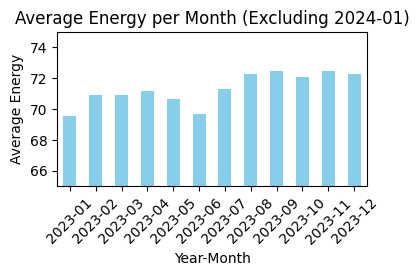

Average Dance per Month: Year-Month
2023-01    61.405063
2023-02    63.406250
2023-03    60.045455
2023-04    60.785124
2023-05    59.937984
2023-06    60.360000
2023-07    62.072000
2023-08    61.856655
2023-09    61.880282
2023-10    61.951724
2023-11    61.553506
2023-12    61.731293
Freq: M, Name: Dance, dtype: float64
Average Danceability: 61.676767676767675



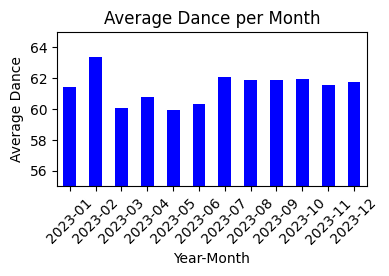

Average Happiness per Month: Year-Month
2023-01    55.898734
2023-02    55.979167
2023-03    54.522727
2023-04    58.049587
2023-05    55.449612
2023-06    55.952000
2023-07    54.696000
2023-08    55.450512
2023-09    55.792254
2023-10    55.427586
2023-11    54.845018
2023-12    55.336735
Freq: M, Name: Happy, dtype: float64
Average Happiness: 55.30639730639731



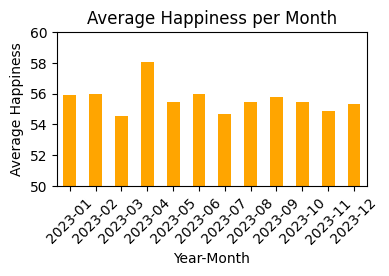

Average BPM per Month: Year-Month
2023-01    126.531646
2023-02    125.885417
2023-03    128.215909
2023-04    129.785124
2023-05    124.077519
2023-06    125.192000
2023-07    126.416000
2023-08    123.901024
2023-09    123.841549
2023-10    124.020690
2023-11    123.269373
2023-12    124.040816
Freq: M, Name: BPM, dtype: float64
Average BPM: 123.82154882154882



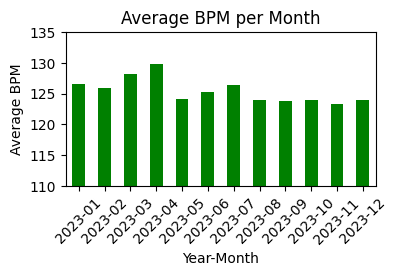

Average Loudness per Month: Year-Month
2023-01   -6.607595
2023-02   -6.572917
2023-03   -6.477273
2023-04   -6.305785
2023-05   -6.550388
2023-06   -6.552000
2023-07   -6.432000
2023-08   -6.081911
2023-09   -6.063380
2023-10   -6.100000
2023-11   -6.062731
2023-12   -6.074830
Freq: M, Name: Loud, dtype: float64
Average Loudness: -6.107744107744108



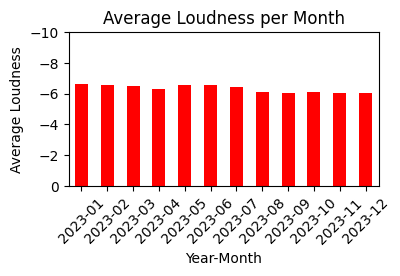

In [14]:



# Prepare the streaming history data

combined_end_times = [entry['endTime'] for entry in streaming_history_0_data + streaming_history_1_data]
streaming_history_df = pd.DataFrame({'endTime': combined_end_times, 'trackName': [entry['trackName'] for entry in streaming_history_0_data + streaming_history_1_data]})
streaming_history_df['endTime'] = pd.to_datetime(streaming_history_df['endTime'])
streaming_history_df['Year-Month'] = streaming_history_df['endTime'].dt.to_period('M')

merged_dfs = pd.merge(streaming_history_df, df[['Song', 'Energy']], left_on='trackName', right_on='Song')
filtered_dfs = merged_dfs[merged_dfs['Year-Month'] != '2024-01']
# Merge with the main DataFrame for additional attributes
attributes = ['Song', 'Dance', 'Happy', 'BPM', 'Loud']
merged_df = pd.merge(streaming_history_df, df[attributes], left_on='trackName', right_on='Song')

# Drop duplicates to consider each song once per month
merged_unique_songs_per_month = merged_df.drop_duplicates(subset=['Year-Month', 'trackName'])
filtered_df = merged_unique_songs_per_month[merged_unique_songs_per_month['Year-Month'] != '2024-01']
# Calculate the monthly averages for each attribute
average_energy_per_month = filtered_dfs.drop_duplicates(subset=['Year-Month', 'trackName']).groupby('Year-Month')['Energy'].mean().sort_index()
average_dance_per_month = filtered_df.groupby('Year-Month')['Dance'].mean().sort_index()
average_happiness_per_month = filtered_df.groupby('Year-Month')['Happy'].mean().sort_index()
average_bpm_per_month = filtered_df.groupby('Year-Month')['BPM'].mean().sort_index()
average_loudness_per_month = filtered_df.groupby('Year-Month')['Loud'].mean().sort_index()

# Display the results
# Binary results and graphs of average caracteristics of songs listened by months


print("Average Energy per Month:",average_energy_per_month)
print("Average Energy:", average_energy)
print()
plt.figure(figsize=(4, 2))
average_energy_per_month.plot(kind='bar', color='skyblue')
plt.title('Average Energy per Month (Excluding 2024-01)')
plt.xlabel('Year-Month')
plt.ylabel('Average Energy')
plt.ylim(65, 75)  # Setting the y-axis limits to 60-80
plt.xticks(rotation=45)
plt.show()

print("Average Dance per Month:", average_dance_per_month)
print("Average Danceability:", average_danceability)
print()
plt.figure(figsize=(4, 2))
average_dance_per_month.plot(kind='bar', color='blue')
plt.title('Average Dance per Month')
plt.xlabel('Year-Month')
plt.ylabel('Average Dance')
plt.ylim(55, 65)
plt.xticks(rotation=45)
plt.show()


print("Average Happiness per Month:", average_happiness_per_month)
print("Average Happiness:", average_happiness)
print()
plt.figure(figsize=(4, 2))
average_happiness_per_month.plot(kind='bar', color='orange')
plt.title('Average Happiness per Month')
plt.xlabel('Year-Month')
plt.ylabel('Average Happiness')
plt.ylim(50, 60)
plt.xticks(rotation=45)
plt.show()

print("Average BPM per Month:", average_bpm_per_month)
print("Average BPM:", average_bpm)
print()
plt.figure(figsize=(4, 2))
average_bpm_per_month.plot(kind='bar', color='green')
plt.title('Average BPM per Month')
plt.xlabel('Year-Month')
plt.ylabel('Average BPM')
plt.ylim(110, 135)
plt.xticks(rotation=45)
plt.show()


print("Average Loudness per Month:", average_loudness_per_month)
print("Average Loudness:", average_loud)
print()
plt.figure(figsize=(4, 2))
average_loudness_per_month.plot(kind='bar', color='red')
plt.title('Average Loudness per Month')
plt.xlabel('Year-Month')
plt.ylabel('Average Loudness')
plt.ylim(0, -10)
plt.xticks(rotation=45)
plt.show()



Average Time Listened per Month (Excluding 2024-01) (min):
Year-Month
2023-01    114.780841
2023-02    107.408951
2023-03    111.298327
2023-04    103.206581
2023-05    102.594389
2023-06    103.408673
2023-07     99.709802
2023-08     79.816816
2023-09     80.799915
2023-10     80.112540
2023-11     79.766910
2023-12     79.624560
Freq: M, Name: Time Listened (sec), dtype: float64
Average Time Listened: 50.46239036016949 minutes


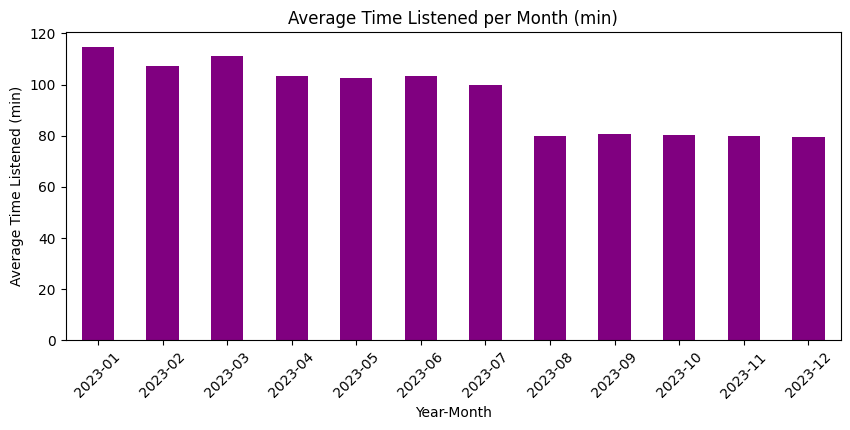

In [15]:
#Average listening time per month in 2023 

mergedd_df = pd.merge(streaming_history_df, df[['Song', 'Time Listened (sec)']], left_on='trackName', right_on='Song')

# Filter out the data for '2024-01'
filteredd_df = mergedd_df[mergedd_df['Year-Month'] != '2024-01']

# Drop duplicates to consider each song once per month
filtered_unique_songs_per_month = filteredd_df.drop_duplicates(subset=['Year-Month', 'trackName'])

# Calculate the average time listened per month
average_time_listened_per_month = (filtered_unique_songs_per_month.groupby('Year-Month')['Time Listened (sec)'].mean().sort_index())/60
print("Average Time Listened per Month (Excluding 2024-01) (min):")
print(average_time_listened_per_month)
print(f"Average Time Listened: {average_time_listened_per_day_min} minutes")

#Graph of the average listening time by months

plt.figure(figsize=(10, 4))
average_time_listened_per_month.plot(kind='bar', color='purple')
plt.title('Average Time Listened per Month (min)')
plt.xlabel('Year-Month')
plt.ylabel('Average Time Listened (min)')
plt.xticks(rotation=45)
plt.show()


In [16]:
# Filter the data for given dates
#december_df represent the december month excluding exam dates
#december1_df and may_df represent the exam dates
#sep_df represent holiday without internship


filtered_december1_df = filtered_df[(filtered_df['endTime'] >= '2023-12-01') & (filtered_df['endTime'] < '2023-12-08')]
filtered_december1_dfs = filtered_dfs[(filtered_df['endTime'] >= '2023-12-01') & (filtered_dfs['endTime'] < '2023-12-08')]
filteredd_december1_df = filteredd_df[(filteredd_df['endTime'] >= '2023-12-01') & (filtered_df['endTime'] < '2023-12-08')]

filtered_december_df = filtered_df[(filtered_df['endTime'] >= '2023-12-08') & (filtered_df['endTime'] < '2024-01-01')]
filtered_december_dfs = filtered_dfs[(filtered_df['endTime'] >= '2023-12-08') & (filtered_dfs['endTime'] < '2024-01-01')]
filteredd_december_df = filteredd_df[(filteredd_df['endTime'] >= '2023-12-08') & (filtered_df['endTime'] < '2024-01-01')]

filtered_sep_df = filtered_df[(filtered_df['endTime'] >= '2023-09-01') & (filtered_df['endTime'] < '2023-10-01')]
filtered_sep_dfs = filtered_dfs[(filtered_df['endTime'] >= '2023-09-01') & (filtered_dfs['endTime'] < '2023-10-01')]
filteredd_sep_df = filteredd_df[(filteredd_df['endTime'] >= '2023-09-01') & (filtered_df['endTime'] < '2023-10-01')]

filtered_may_df = filtered_df[(filtered_df['endTime'] >= '2023-05-28') & (filtered_df['endTime'] < '2023-06-10')]
filtered_may_dfs = filtered_dfs[(filtered_df['endTime'] >= '2023-05-28') & (filtered_dfs['endTime'] < '2023-06-10')]
filteredd_may_df = filteredd_df[(filteredd_df['endTime'] >= '2023-05-28') & (filtered_df['endTime'] < '2023-06-10')]


#find the average

december_avg_energy = filtered_december_dfs['Energy'].mean()
december_avg_dance = filtered_december_df['Dance'].mean()
december_avg_happiness = filtered_december_df['Happy'].mean()
december_avg_bpm = filtered_december_df['BPM'].mean()
december_avg_loudness = (filtered_december_df['Loud'].mean())*(-1)
december_avg_time_listened_min = (filteredd_december_df['Time Listened (sec)'].mean())/60

december1_avg_energy = filtered_december1_dfs['Energy'].mean()
december1_avg_dance = filtered_december1_df['Dance'].mean()
december1_avg_happiness = filtered_december1_df['Happy'].mean()
december1_avg_bpm = filtered_december1_df['BPM'].mean()
december1_avg_loudness = (filtered_december1_df['Loud'].mean())*(-1)
december1_avg_time_listened_min = (filteredd_december1_df['Time Listened (sec)'].mean())/60

may_avg_energy = filtered_may_dfs['Energy'].mean()
may_avg_dance = filtered_may_df['Dance'].mean()
may_avg_happiness = filtered_may_df['Happy'].mean()
may_avg_bpm = filtered_may_df['BPM'].mean()
may_avg_loudness = (filtered_may_df['Loud'].mean())*(-1)
may_avg_time_listened_min = (filteredd_may_df['Time Listened (sec)'].mean())/60

sep_avg_energy = filtered_sep_dfs['Energy'].mean()
sep_avg_dance = filtered_sep_df['Dance'].mean()
sep_avg_happiness = filtered_sep_df['Happy'].mean()
sep_avg_bpm = filtered_sep_df['BPM'].mean()
sep_avg_loudness = (filtered_sep_df['Loud'].mean())*(-1)
sep_avg_time_listened_min = (filteredd_sep_df['Time Listened (sec)'].mean())/60

december_averages = [december_avg_energy, december_avg_dance, december_avg_happiness, december_avg_bpm, december_avg_loudness, december_avg_time_listened_min]
december1_averages = [december1_avg_energy, december1_avg_dance, december1_avg_happiness, december1_avg_bpm, december1_avg_loudness, december1_avg_time_listened_min]
may_averages = [may_avg_energy, may_avg_dance, may_avg_happiness, may_avg_bpm, may_avg_loudness, may_avg_time_listened_min]
sep_averages = [sep_avg_energy, sep_avg_dance, sep_avg_happiness, sep_avg_bpm, sep_avg_loudness, sep_avg_time_listened_min]


# Display the results as binary


print(f"Average Energy (Dec): {december_avg_energy}")
print(f"Average Dance (Dec): {december_avg_dance}")
print(f"Average Happiness (Dec): {december_avg_happiness}")
print(f"Average BPM (Dec): {december_avg_bpm}")
print(f"Average Loudness (Dec): {december_avg_loudness}")
print(f"Average Time Listened (Dec): {december_avg_time_listened_min}")
print()


print(f"Average Energy (Dec 1-7): {december1_avg_energy}")
print(f"Average Dance (Dec 1-7): {december1_avg_dance}")
print(f"Average Happiness (Dec 1-7): {december1_avg_happiness}")
print(f"Average BPM (Dec 1-7): {december1_avg_bpm}")
print(f"Average Loudness (Dec 1-7): {december1_avg_loudness}")
print(f"Average Time Listened (Dec 1-7): {december1_avg_time_listened_min}")
print()

print(f"Average Energy (May_Exam): {may_avg_energy}")
print(f"Average Dance (May_Exam): {may_avg_dance}")
print(f"Average Happiness (May_Exam): {may_avg_happiness}")
print(f"Average BPM (May_Exam): {may_avg_bpm}")
print(f"Average Loudness (May_Exam): {may_avg_loudness}")
print(f"Average Time Listened (May_Exam): {may_avg_time_listened_min}")
print()

print(f"Average Energy (Sep): {sep_avg_energy}")
print(f"Average Dance (Sep): {sep_avg_dance}")
print(f"Average Happiness (Sep): {sep_avg_happiness}")
print(f"Average BPM (Sep): {sep_avg_bpm}")
print(f"Average Loudness (Sep): {sep_avg_loudness}")
print(f"Average Time Listened (Sep): {sep_avg_time_listened_min}")



Average Energy (Dec): 71.47305389221557
Average Dance (Dec): 61.4311377245509
Average Happiness (Dec): 54.11377245508982
Average BPM (Dec): 122.83233532934132
Average Loudness (Dec): 6.077844311377246
Average Time Listened (Dec): 72.02392285429141

Average Energy (Dec 1-7): 73.34645669291339
Average Dance (Dec 1-7): 62.125984251968504
Average Happiness (Dec 1-7): 56.94488188976378
Average BPM (Dec 1-7): 125.62992125984252
Average Loudness (Dec 1-7): 6.070866141732283
Average Time Listened (Dec 1-7): 89.61909803149607

Average Energy (May_Exam): 69.75
Average Dance (May_Exam): 57.225
Average Happiness (May_Exam): 54.9375
Average BPM (May_Exam): 125.5375
Average Loudness (May_Exam): 6.825
Average Time Listened (May_Exam): 117.10946645833334

Average Energy (Sep): 72.49647887323944
Average Dance (Sep): 61.88028169014085
Average Happiness (Sep): 55.79225352112676
Average BPM (Sep): 123.84154929577464
Average Loudness (Sep): 6.063380281690141
Average Time Listened (Sep): 80.79991496478873


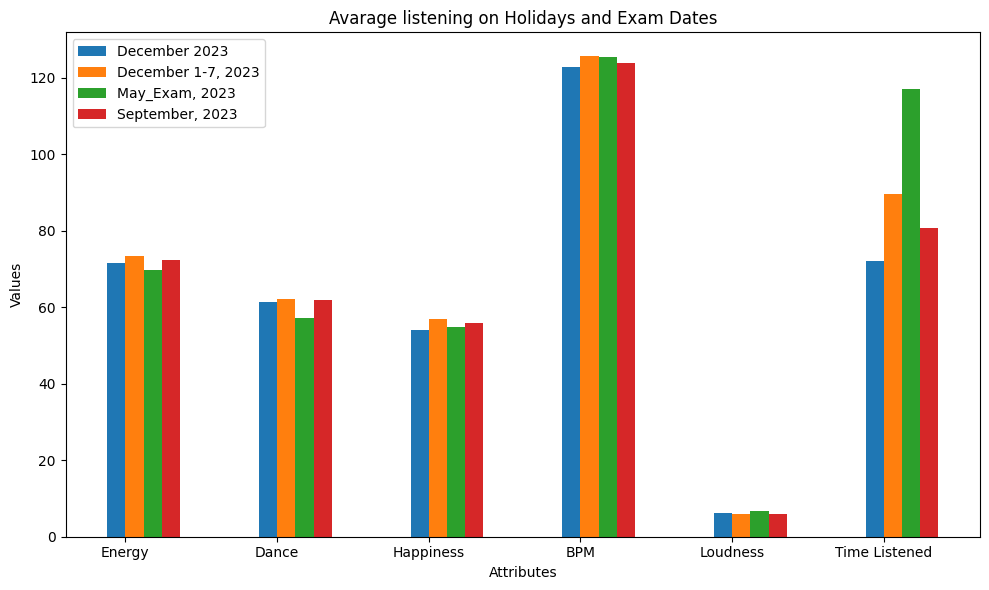

In [17]:
#In this ection there is visual comparaison of the averages.
#bar1 represent the december month excluding exam dates
#bar2 and bar3 represent the exam dates
#bar4 represent holiday without internship



attributes = ['Energy', 'Dance', 'Happiness', 'BPM', 'Loudness', 'Time Listened']


plt.figure(figsize=(10, 6))
bar_width = 0.12
index = np.arange(len(attributes))

bar1 = plt.bar(index, december_averages, bar_width, label='December 2023')
bar2 = plt.bar(index + bar_width, december1_averages, bar_width, label='December 1-7, 2023')
bar3 = plt.bar(index + bar_width*2, may_averages, bar_width, label='May_Exam, 2023')
bar4 = plt.bar(index + bar_width*3, sep_averages, bar_width, label='September, 2023')


plt.xlabel('Attributes')
plt.ylabel('Values')
plt.title('Average listening on Holidays and Exam Dates')
plt.xticks(index + bar_width / 2, attributes)
plt.legend()
plt.tight_layout()
plt.show()